In [1]:
import csv
import numpy as np
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir,'..','params'))
from load_params import *

# Open and read a CSV file
with open('rho_ECOSTRESS_S2A.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    
    # Ignorer la première ligne (en-tête)
    next(csv_reader)
    
    # Ignorer la première colonne (en-tête)
    A = np.array([[float(value) for value in row[1:]]  for row in csv_reader])
#print(A)


In [22]:
# Rajout des csts
T_9 = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq9
T_8_new = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8_new
T_8 = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8

In [23]:
B = A @ T_8.T



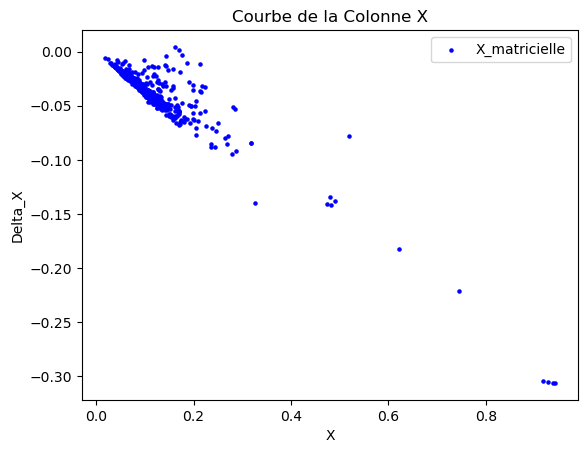

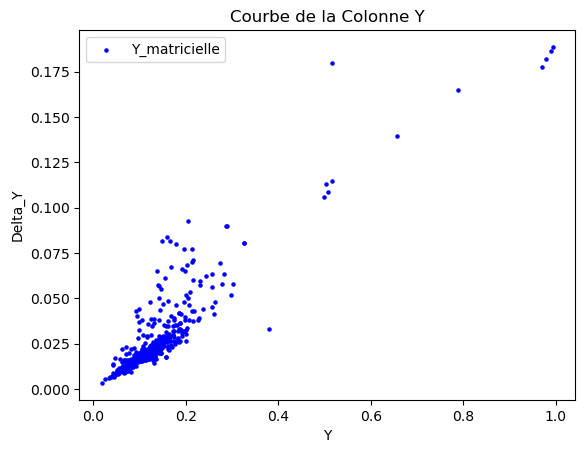

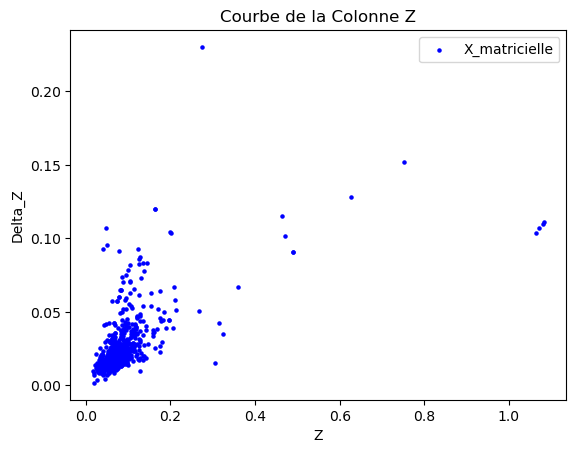

In [19]:
#Tracer les graphes
import matplotlib.pyplot as plt

# Open and read a CSV file
with open('xyz_ECOSTRESS.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Ignorer la première ligne (en-tête)
    next(csv_reader)
    
    # Ignorer la première colonne (en-tête)
    XYZ = np.array([[float(value) for value in row[1:]]  for row in csv_reader])

np.save('XYZ.npy', XYZ)    

# Extraire les trois colonnes sans cst
X_sim = B[:, 0]  # Première colonne
Y_sim = B[:, 1]  # Deuxième colonne
Z_sim = B[:, 2]  # Troisième colonne


X = XYZ[:,0]
Y = XYZ[:,1]
Z = XYZ[:,2]

x = np.linspace(0, 10, len(B))

# Effectuer une régression linéaire
X_coefficients_sim = np.polyfit(x, X_sim, 1)  # Degré 1 pour une droite
X_fit_sim = np.polyval(X_coefficients_sim, x) 

Y_coefficients_sim = np.polyfit(x, Y_sim, 1)  # Degré 1 pour une droite
Y_fit_sim = np.polyval(Y_coefficients_sim, x) 

Z_coefficients_sim = np.polyfit(x, Z_sim, 1)  # Degré 1 pour une droite
Z_fit_sim = np.polyval(Z_coefficients_sim, x) 


# Fenêtre pour la première colonne
plt.figure(1)  # Créer une nouvelle figure (fenêtre)
#plt.plot(x, X_fit_sim, label='régression linéaire X_simulé', color='red')
plt.scatter(X, X_sim-X, label="X_matricielle", color='blue', s=5)
#plt.scatter(X_sim, label="X_simulé", color='red', s=5)
plt.xlabel('X')
plt.ylabel('Delta_X')
plt.title('Courbe de la Colonne X')
plt.legend()


# Fenêtre pour la deuxième colonne
plt.figure(2)  # Créer une nouvelle figure (fenêtre)
plt.scatter(Y, Y_sim-Y, label="Y_matricielle", color='blue', s=5)
plt.xlabel('Y')
plt.ylabel('Delta_Y')
plt.title('Courbe de la Colonne Y')
plt.legend()

# Fenêtre pour la troisième colonne

plt.figure(3)  # Créer une nouvelle figure (fenêtre)
plt.scatter(Z, Z_sim-Z, label="X_matricielle", color='blue', s=5)
plt.xlabel('Z')
plt.ylabel('Delta_Z')
plt.title('Courbe de la Colonne Z')
plt.legend()






# Afficher le graphique
plt.show()





In [13]:
# Calcul de l'erreur quadratique moyenne (MSE)
mse_X = np.mean((X_sim- X)**2)
mse_Y = np.mean((Y_sim- Y)**2)
mse_Z = np.mean((Z_sim- Z)**2)



# Racine carrée de l'erreur quadratique moyenne (RMSE)
rmse_X = np.sqrt(mse_X)
rmse_Y = np.sqrt(mse_Y)
rmse_Z = np.sqrt(mse_Z)


print(f"RMSE: {rmse_X}, {rmse_Y}, {rmse_Z}")


RMSE: 0.08882414537281398, 0.07581995580857828, 0.19758979055544898


In [14]:
from sklearn.metrics import r2_score
r_squared_X = r2_score(X_sim, X)
r_squared_Y = r2_score(Y_sim, Y)
r_squared_Z = r2_score(Z_sim, Z)


print(f"R^2: {r_squared_X},{r_squared_Y},{r_squared_Z}")

ImportError: cannot import name '_orthogonal' from partially initialized module 'scipy.special' (most likely due to a circular import) (/Users/karine/opt/anaconda3/lib/python3.9/site-packages/scipy/special/__init__.py)